In [1]:
include("../ToolBox/ToolBox.jl")
import FileIO
using .ToolBox
using .Geometry
using .Load
using Colors
import JLD

No Geocode
But the function can be extended to geogode.
The function all ready uses a target_llh to resample. 
For Geocoding the target_llh should be made from a lat lon grid instead of using the super_master.

!! Warning. Making a suiteble lat lon grid for geocodeing can be a challenge?

In [ ]:
# coherence assembly

function coherence_assembly(files, supermaster_view, dem_path, subswath, result_folder, dem_nan, 
        pod_folder; supermaster_index =1, polarization_array = ["VV","VH"], kernel = ones(4,14))
    
    # Write info about function call to file
    # files,  supermaster_view, subswath, supermaster_name, sequential
    
    
    # find slave index's 
    
    
    #do first pair
    # Choose the pair with supermaster
    # Set supermaster as master
    # Get and save lines_super, samples_super, lut_super
    for polarization in polarization_array

        # compute coherence
        #complex_coherence, master_intensity, slave_intensity, 
        #lines_super, samples_super, lut_super = coherence_worker(product_folders, master_view, dem_path, 
                                                                 # subswath, dem_nan, pod_folder, 
                                                                    #polarization, kernel)
        # save products
        #save_worker(complex_coherence, master_intensity, slave_intensity,
               #  ID, result_folder, save_string)
        
        # Find taget_llh using lines_super, samples_super, lut_super
    end
        
    
    # save the auxilari info
    save_aux(lines_super,samples_super,lut_super,result_folder)
    
        
    ## lop to do all other pairs
    for i in slave_index_list
        
        # get slave path 
        slave_path = files[i]    
        master_path = files[i-1]
        
        ### Use taget_llh to find target_master_lines ,target_master_samples (They are in mosaic)
            ### Use Geometri.to_line_sample() with master meta and pod.
        
        # Find mast view that covers the same area as super view.
        master_mosaic_line_range = floor(Int,minimum(target_master_lines)) : ciel(Int,maximum(target_master_lines)) 
        master_sample range = floor(Int,minimum(target_master_samples)) : ciel(Int,maximum(target_master_samples))
            ### Convert from mosaic lines range to normal line range
            master_view = (master_line_range,master_sample range)
        
         for polarization in polarization_array

            # compute coherence
            #complex_coherence, master_intensity, slave_intensity, 
            #lines, samples, lut = coherence_worker(product_folders, master_view, dem_path, 
                                                                      subswath, dem_nan, pod_folder, 
                                                                        polarization, kernel)
            # Resample
                # use Misc.resample() to resample to target_master_lines and target_master_samples
            
            # save products
            #save_worker(complex_coherence, master_intensity, slave_intensity,
                     #ID, result_folder, save_string)
        end
    
    end
end

In [6]:
using Dates
using JLD
"""
    extract_datetime(SAFE_path; start_date=true)
    
    Extracts DateTime from a .SAFE file string. 

    # Arguments
    -`SAFE_path::String`: path to or name of .SAFE file
    -`start_date::Bool`: true for returning start date, false for end date.

    # Output
    - `::DateTime`: Date and time of .SAFE file

# Examples:
```jldoctest
julia> extract_datetime(S1A_IW_SLC__1SDV_20170309T054035_20170309T054103_015611_019AB8_A0F2.SAFE)
2017-03-09T05:40:35
```
"""
# SAFE_path can be path or SAFE file name, works either way.
function extract_datetime(SAFE_path; start_date=true)
    extract_SAFE_name = split(SAFE_path, "/")[end]
    if start_date
        date_string = split(extract_SAFE_name, "_")[6]
    else
        date_string = split(extract_SAFE_name, "_")[7]
    end
    year = date_string[1:4]
    month = date_string[5:6]
    day = date_string[7:8]
    hour = date_string[10:11]
    minute = date_string[12:13]
    second = date_string[14:end]
    date_int = parse.(Int, [year, month, day, hour, minute, second])
    return DateTime(date_int...)
end

function days_between_acquisitions(date1, date2)
    return Dates.value(Date(date1) - Date(date2))
end

"""
    number_of_SAFE_files(directory)
    
    Counts all .SAFE file names in directory

    # Arguments
    -`directory::String`: path to directory

    # Output
    - `count::Int64`: Number of .SAFE files in directory

# Examples:
```jldoctest
julia> number_of_SAFE_files(/home/directory)
30
```
"""
# counts total number of SAFE files in directory
function number_of_SAFE_files(directory)
    count = 0
    for (root, dirs, files) in walkdir(directory)
        for dir in dirs
            if split(dir, ".")[end] == "SAFE"
                count += 1
            end
        end
    end
    return count
end

function number_of_SAFE_files_v2(directory)
    count = sum( [ split(elem, ".")[end] == "SAFE" for elem in readdir(directory)])
    return count
end

"""
    all_SAFE_files(directory)
    
    returns all .SAFE file names in directory as array

    # Arguments
    -`directory::String`: path to directory

    # Output
    - `all_files::Array{String,N}`: Return .SAFE file names in Array. N is number of files

# Examples:
```jldoctest
julia> file_array = all_SAFE_files(/home/directory)
30-element Array{String,1}:
"S1B_IW_SLC__1SDV_20170303T053950_20170303T054018_004540_007E86_420F.SAFE"
...
"S1B_IW_SLC__1SDV_20170830T053948_20170830T054014_007165_00CA0A_1DA1.SAFE"
```
"""
function all_SAFE_files(directory)
    all_files = Array{String, 1}(undef, number_of_SAFE_files(directory))
    count = 0
    for (root, dirs, files) in walkdir(directory)
        for dir in dirs
            if split(dir, ".")[end] == "SAFE"
                all_files[count + 1] = dir
                count += 1
            end
        end
    end
    return all_files
end

function all_SAFE_files_v2(directory)
    files = readdir(directory)
    index = [ split(elem, ".")[end] == "SAFE" for elem in files]
    return files[index]
end 
    
    
"""
    save_as_jld(data, file_name, file_path)

    saves input as .jld file

    # Arguments
    -`data::Any`: Saves input data
    -`file_name::String``: name of file without extension
    -`file_path::String``: path to directory

    # Output
    - None, saves file in file_path

# Examples:
```jldoctest
julia> save_as_jld(data, "data_file_name", "/home/user/result_folder")
```
"""
function save_as_jld(data, file_name, file_path)
    path = joinpath(file_path, file_name*".jld")
    JLD.save(path, "data", data)
end


function generate_id(product_folders, polarization)
    ID = Dict{String,String}()
    master_satellite = string(split(split(product_folders[1], "/")[end], "_")[1][end])
    slave_satellite = string(split(split(product_folders[2], "/")[end], "_")[1][end])

    # get last four digits in file name (identifier)
    master_safe_id = split(split(product_folders[1], "_")[end], ".")[1]
    slave_safe_id = split(split(product_folders[2], "_")[end], ".")[1]

    # compute days between acquisitions:
    master_date = replace.(string(Date(extract_datetime(product_folders[1]))),  "-" => "")
    slave_date = replace.(string(Date(extract_datetime(product_folders[2]))),  "-" => "")
    days_between_acq = string(abs(days_between_acquisitions(extract_datetime(product_folders[1]), extract_datetime(product_folders[2]))))*"d"

    # define id strings on format:            
    ID["master_id"] = "S1"*master_satellite*"_"*polarization*"_"*"M"*master_date*"_"*master_safe_id
    ID["slave_id"] = "S1"*slave_satellite*"_"*polarization*"_"*"S"*slave_date*"_"*slave_safe_id
    ID["coherence_id"] = master_satellite*slave_satellite*"_"*polarization*"_"*"M"*master_date*"_"*master_safe_id*"_"*"S"*slave_date*"_"*slave_safe_id*"_"*days_between_acq
    return ID
end


function sort_satellite_type(files, S1_selection)
    if S1_selection == "both"
        files = files[sortperm(extract_datetime.(files))]
    elseif S1_selection == "A"
        files = files[hcat(split.(files, "_")...)[1, :] .== "S1A"]
        files = files[sortperm(extract_datetime.(files))]
    else
        files = files[hcat(split.(files, "_")...)[1, :] .== "S1B"]
        files = files[sortperm(extract_datetime.(files))]
    end
    return files
end


sort_satellite_type (generic function with 1 method)

In [46]:
"""
    coherence_worker(product_folders, master_view, dem_path, 
                     subswath, result_folder, dem_nan, pod_folder; 
                     kernel = ones(4,14), polarization = ["VV", "VH"], 
                     save_string=["coherence", "intensity", "auxillary"])

Computes and saves coherence, intensities, look up table and auxillary data for a Sentinel-1 image pair

# Arguments
- `product_folders::Array{String,2}`: Array with [master safe file, slave safe file].
- `master_view::Array{UnitRange{Int64},2}`: Master view in (line, sample) coordinates
- `dem_path::String`: The path to the DEM                
- `subswath::Int`: Select a subswath, can be 1, 2 or 3
- `result_folder::String`: Path to directory for saving the results
- `dem_nan::Float`: The value to replace NaN in the DEM.
- `pod_folder::String`: Path to directory with PODs. If PODS are not found, they will be downloaded and saved here.
- `kernel::Array{Float64,2}`: Chosen kernel. Default is ones(4,14) 
- `polarization::Array{String,2}`:  Array with chosen polarizations. Default is ["VV", "VH"]                           
- `save_string::Array{String,3}`: Array with chosen products. Default is ["coherence", "intensity", "auxillary"]

# Output
- None, saves results as .jld in result directory

# Examples:
```jldoctest
julia> master_folder = "/home/directory/S1/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE"
julia> slave1_folder = "/home/directory/S1/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE"
julia> product_folders = [master_folder, slave1_folder];
julia> result_folder = "/home/directory/results"
julia> pod_folder = "/home/directory/S1A_POEORB"
julia> dem_path = "/home/directory/dem/srtm_38_01_reprojected.tif"
julia> dem_nan = 40
julia> master_view = [2000-1524:6000-1524, 4801:7801]
julia> coherence_worker(product_folders, master_view, dem_path, 
                        3, result_folder, dem_nan, pod_folder)
```
"""
function coherence_worker(product_folders, master_view, dem_path, 
                          subswath, dem_nan, pod_folder, polarization; 
                          kernel = ones(4,14))
    
        stride_line = floor(Int,size(kernel)[1]/2)
        stride_sample = floor(Int,size(kernel)[2]/2)

        # get pod paths
        pod_paths = [Load.pod_path(folder, pod_folder) for folder in product_folders]

        # get paths
        file_paths = [Load.slc_paths(folder, polarization, subswath) for folder in product_folders]
        meta = [Load.slc_meta(path[2]) for path in file_paths]  # path[2] selects meta data
        calibration = [Load.slc_calibration(file_paths[i][3],meta[i]["t_0"]) 
                                    for i in 1:length(product_folders)];
        # load POD
        println("load POD")
        precise_orbit = [Load.precise_orbit(pod_paths[i],meta[i]["t_0"]) 
                                    for i in 1:length(product_folders)]

        # loads DEM, TODO: could be input as well to save loading time
        footprint = SlcUtil.footprint(meta[1], master_view)
        latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
        dem = Load.dem(dem_path, latlon_window; nan_fill = dem_nan, padding=[90,90]);

        println("Coregistering slave")
        slave_data,flat,lut =  coregister_slave(master_view,
                                                file_paths[2][1],
                                                meta, precise_orbit, dem)  # meta should be 2 Dict array

        slave_data, mosaic_view = SlcUtil.mosaic(slave_data, master_view, meta[1]);
        flat, mosaic_view = SlcUtil.mosaic(flat, master_view, meta[1]);
        slave_data = SlcUtil.calibrate_slave_data(slave_data, mosaic_view, lut, calibration[2]);

        master_data = Load.slc_data(file_paths[1][1], master_view);
        master_data,mosaic_view = SlcUtil.mosaic(master_data, master_view, meta[1]);
        master_data = SlcUtil.calibrate_data(master_data, Misc.flatten(mosaic_view...)..., calibration[1]);

        println("Compute complex coherence")
        # compute coherence
        complex_coherence, master_intensity, slave_intensity, lines, samples = SlcUtil.complex_coherence(
                    master_data, slave_data, flat, kernel, mosaic_view);
    
        
        # Subsample 
        lines = lines[1:stride_line:end]
        samples = samples[1:stride_sample:end]
        master_intensity = master_intensity[1:stride_line:end,1:stride_sample:end]
        slave_intensity = slave_intensity[1:stride_line:end,1:stride_sample:end]
        complex_coherence = complex_coherence[1:stride_line:end,1:stride_sample:end]
        
        # Check that the size matches
        @assert length(master_intensity) > 0
        @assert sum(size(master_intensity) .= size(complex_coherence)) == 2
        @assert sum(size(slave_intensity) .= size(complex_coherence)) == 2
        @assert size(master_intensity)[1] == length(lines)
        @assert size(master_intensity)[2] == length(samples)

    return complex_coherence, master_intensity, slave_intensity, lines, samples, lut
end



function superlut_worker(product_folders, supermaster_view, dem_path, 
                          subswath, dem_nan, pod_folder; polarization="VV" ,stride=(2,8))


    # get pod paths
    pod_paths = [Load.pod_path(folder, pod_folder) for folder in product_folders]

    # get paths
    file_paths = [Load.slc_paths(folder, polarization, subswath) for folder in product_folders]
    meta = [Load.slc_meta(path[2]) for path in file_paths]  # path[2] selects meta data

    # load POD
    println("load POD")
    precise_orbit = [Load.precise_orbit(pod_paths[i],meta[i]["t_0"]) 
                                for i in 1:length(product_folders)]

    # loads DEM, TODO: could be input as well to save loading time
    footprint = SlcUtil.footprint(meta[1], master_view)
    latlon_window = ((minimum(footprint[1]), maximum(footprint[1])), (minimum(footprint[2]), maximum(footprint[2])))
    dem = Load.dem(dem_path, latlon_window; nan_fill = dem_nan, padding=[90,90]);

    mosaic_view = SlcUtil.mosaic_view(meta[1],supermaster_view)
    lut_super = Geometry.look_up_table(mosaic_view,meta,precise_orbit,dem,stride=stride)
    
    # get start line
    mosaic_start_line = minimum(lut["slave_line"])
    start_burst = findlast(meta[2]["burst_meta"]["first_line_mosaic"] .<= mosaic_start_line)
    delta =  (start_burst-1)*meta[2]["lines_per_burst"]+1 - meta[2]["burst_meta"]["first_line_mosaic"][start_burst]
    start_line = floor(Int,mosaic_start_line + delta)
    
    # get end line
    mosaic_end_line = maximum(lut["slave_line"])
    end_burst = findfirst(meta[2]["burst_meta"]["first_line_mosaic"] .>= (mosaic_end_line-meta[2]["lines_per_burst"]))
    delta =  (end_burst-1)*meta[2]["lines_per_burst"]+1 - meta[2]["burst_meta"]["first_line_mosaic"][end_burst]
    end_line = ceil(Int,mosaic_end_line + delta)
    
    start_sample = floor(Int,minimum(lut["slave_sample"]))
    end_sample = ceil(Int,maximum(lut["slave_sample"]))
    
    master_view = (start_line:end_line,start_sample:end_sample)
        

    return lut_super, master_view 
end




function save_worker(complex_coherence, master_intensity, slave_intensity,
                     ID, result_folder, save_string)
    
    if sum(save_string .== "coherence") != 0
        println("Saving complex coherence")
        save_as_jld(complex_coherence, ID["coherence_id"]*"_coherence", result_folder)
    end   

    if sum(save_string .== "intensity") != 0
        println("Saving intensities")
        save_as_jld(slave_intensity, ID["slave_id"]*"_intensity", result_folder)
        save_as_jld(master_intensity, ID["master_id"]*"_intensity", result_folder)
    end
end


function save_aux(lines,samples,super_lut, result_folder)
        
        # save lines and samples 
        line_sample_path = joinpath(result_folder,"line_sample.jld")
        JLD.save(line_sample_path, "lines", lines, "samples", samples)
        
        # Save heights
        heights = Misc.interp_grid(lut["master_line"] ,lut["master_sample"],
            reshape(lut["heights"],(length(lut["master_line"]),length(lut["master_sample"])))
            ,lines, samples);

        heights_path = joinpath(result_folder,"heights.jld")
        JLD.save(heights_path, "data", heights)
        
        delete!(lut, "d")
        delete!(lut, "d")
        lut_path = joinpath(result_folder,"super_lut.jld")
        JLD.save(lut_path, "data", lut)
    end

save_aux (generic function with 1 method)

In [30]:
# coherence assembly

function coherence_assembly(files, supermaster_view, dem_path, subswath, result_folder, dem_nan, 
        pod_folder; supermaster_index =1, polarization_array = ["VV","VH"], sequential=true, 
                            save_string=["coherence", "intensity"], kernel = ones(4,14))
    
    ## super master index
    @assert isa(supermaster_index,Int)
    

    folder_names_path = joinpath(result_folder,"assembly_info.txt")   
    open(folder_names_path, "w") do io
        # Save info about inputs
        write(io, "supermaster: $(files[supermaster_index])\n")
        write(io, "subswath: $subswath\n")
        write(io, "master_view: $master_view\n")
        write(io, "sequential: $sequential\n")
        write(io, "dem_nan: $dem_nan\n")
        write(io, "Size(kernel): $(size(kernel))\n")
        for folder in files
            write(io,"$folder\n")
        end
    end;
    
    
    # find slave index's
    slave_index_list = collect(1:length(files))
    
    
    
    #do first pair
    supermaster_path = files[supermaster_index]
    lines_super = 0
    samples_super = 0
    lut_super = 0
    if sequential
        # TODO maybe flip the file list if neacessery
        @assert supermaster_index < length(files) # connot be the last file. Consider to flip the file list
        
        slave_index = supermaster_index +1
        
        #update slave index_list
        deleteat!(slave_index_list,slave_index)
        # Remove first element because it is only master
        slave_index_list = slave_index_list[2:end]
        
        
        product_pair = [supermaster_path, files[slave_index]]
        
        for polarization in polarization_array
            # get id's for saving, ID is a dict 
            ID = generate_id(product_folders, polarization)
            
            # compute coherence
            complex_coherence, master_intensity, slave_intensity, 
            lines_super, samples_super, lut_super = coherence_worker(product_folders, master_view, dem_path, 
                                                                      subswath, dem_nan, pod_folder, 
                                                                        polarization, kernel)
            
            # save products
            save_worker(complex_coherence, master_intensity, slave_intensity,
                     ID, result_folder, save_string)
        end
        
    else
        if supermaster_index == 1
            slave_index = 2
        else
            slave_index = 1
        end
        
        #update slave index_list
        deleteat!(slave_index_list, findin(slave_index_list, [slave_index]))
        deleteat!(slave_index_list, findin(slave_index_list, [supermaster_index]))
        
        product_pair = [supermaster_path, files[slave_index]]
        
        for polarization in polarization_array
            # get id's for saving, ID is a dict 
            ID = generate_id(product_folders, polarization)
            
            # compute coherence
            complex_coherence, master_intensity, slave_intensity, 
            lines_super, samples_super, lut_super = coherence_worker(product_folders, master_view, dem_path, 
                                                                      subswath, dem_nan, pod_folder, 
                                                                        polarization, kernel)
            
            # save products
            save_worker(complex_coherence, master_intensity, slave_intensity,
                     ID, result_folder, save_string)
    end
    
    # save the auxilari info
    save_aux(lines_super,samples_super,lut_super,result_folder)
    
   
        
    ## lop to do all other pairs
    for i in slave_index_list
        
        # get slave path 
        slave_path = files[i]    
    
        # get master paths
        master_path = ""
        
        if sequential
            master_path = files[i-1]
            
            super_pair = [supermaster_path, master_path]
            lut_super = look_up_table(master_view,meta,precise_orbit,dem;stride=(2,8))
            # Get master view 
                
        else
            master_path = supermaster_path
            master_view = supermaster_view
        end

        product_pair = [master_path, slave_path]
        
        for polarization in polarization_array
            # get id's for saving, ID is a dict 

            ID = generate_id(product_folders, polarization)
            
            # compute coherence
            complex_coherence, master_intensity, slave_intensity, lines, samples, lut = coherence_worker(
                                 product_folders, master_view, dem_path, subswath, 
                                 dem_nan, pod_folder, ID, polarization; kernel = kernel)
            
            # resample to overmaster
            if sequential
                # RESAMPLE TO OVERMASTER MISSING
                master_path = slave_path
                if i == 2
                    print("Sorry, resampling to overmaster in sequential mode not implemented yet")
                end
            end

            
            # save products
            if sum(save_string .== "coherence") != 0
                save_as_jld(complex_coherence, ID["coherence_id"]*"_coherence", result_folder)
            end 
            
            if sum(save_string .== "intensity") != 0
                save_as_jld(slave_intensity, ID["slave_id"]*"_intensity", result_folder)
                save_as_jld(master_intensity, ID["master_id"]*"_intensity", result_folder)
            end
            
        end
    end
end

coherence_assembly (generic function with 2 methods)

In [ ]:
co_folder = "/home/data/simon/data/143_houston_summer2017/S1B_IW_SLC__1SDV_20170830T122203_20170830T122233_007169_00CA2C_C92C.SAFE"
pre1_folder = "/home/data/simon/data/143_houston_summer2017/S1A_IW_SLC__1SDV_20170824T122248_20170824T122318_018065_01E54E_5C27.SAFE"
products = [pre1_folder,co_folder]

In [1]:
2+5

7

In [27]:
print("hej med $test dig\ndu er sjov")

hej med true dig
du er sjov

In [ ]:
type

In [7]:
directory = "/home/data/eigil/frame407_406"
all_files = all_SAFE_files_v2(directory)
sorted_files = joinpath.(directory, sort_satellite_type(all_files, "A"))

14-element Array{String,1}:
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170309T054035_20170309T054103_015611_019AB8_A0F2.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170321T054035_20170321T054103_015786_019FEE_8439.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170402T054035_20170402T054103_015961_01A51D_080F.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170414T054036_20170414T054104_016136_01AA6F_57BD.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170426T054036_20170426T054104_016311_01AFCB_FE90.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170508T054037_20170508T054105_016486_01B519_75D9.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170520T054038_20170520T054106_016661_01BA73_C797.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170601T054033_20170601T054101_016836_01BFD8_6FCF.SAFE"
 "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170613T054034_20170613T054102_017011_01C547_641A.SAFE"
 "/home/data/eigil

In [12]:
isa(length(sorted_files),Int)

true

In [31]:
overmaster_path = "/home/data/eigil/frame407_406/S1A_IW_SLC__1SDV_20170309T054035_20170309T054103_015611_019AB8_A0F2.SAFE"
result_folder = "/home/data/eigil/results/interferogram"
pod_folder = "/home/data/eigil/S1A_POEORB"
dem_path = "/home/data/eigil/srtm_38_01_reprojected.tif"
dem_nan = 40
master_view = [2000-1524:6000-1524, 4801:7801]
polarization_array = ["VV"]

coherence_assembly(sorted_files, overmaster_path, master_view, dem_path, 3, result_folder, 
                   dem_nan, pod_folder, polarization_array, sequential=true, save_string=["coherence"])

load POD
Coregistering slave
Compute complex coherence
Sorry, resampling to overmaster in sequential mode not implemented yetSaving complex coherence
load POD
Coregistering slave
Compute complex coherence
Saving complex coherence
POE not found. Dowload initiated
load POD
Coregistering slave
Compute complex coherence
Saving complex coherence
POE not found. Dowload initiated
load POD
Coregistering slave


InterruptException: InterruptException:

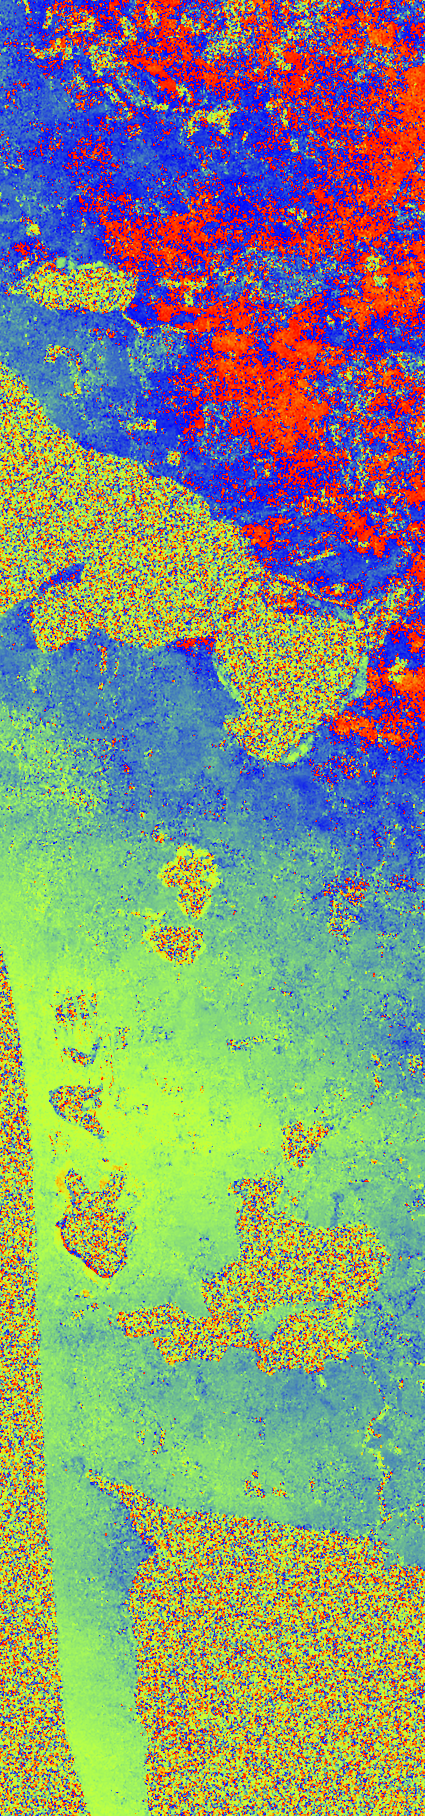

In [32]:
coherence = JLD.load("/home/data/eigil/results/interferogram/AA_VV_M20170309_A0F2_S20170321_8439_12d_coherence.jld", "data")[:, end:-1:1];
phase_img = SlcUtil.plot_phase(coherence)


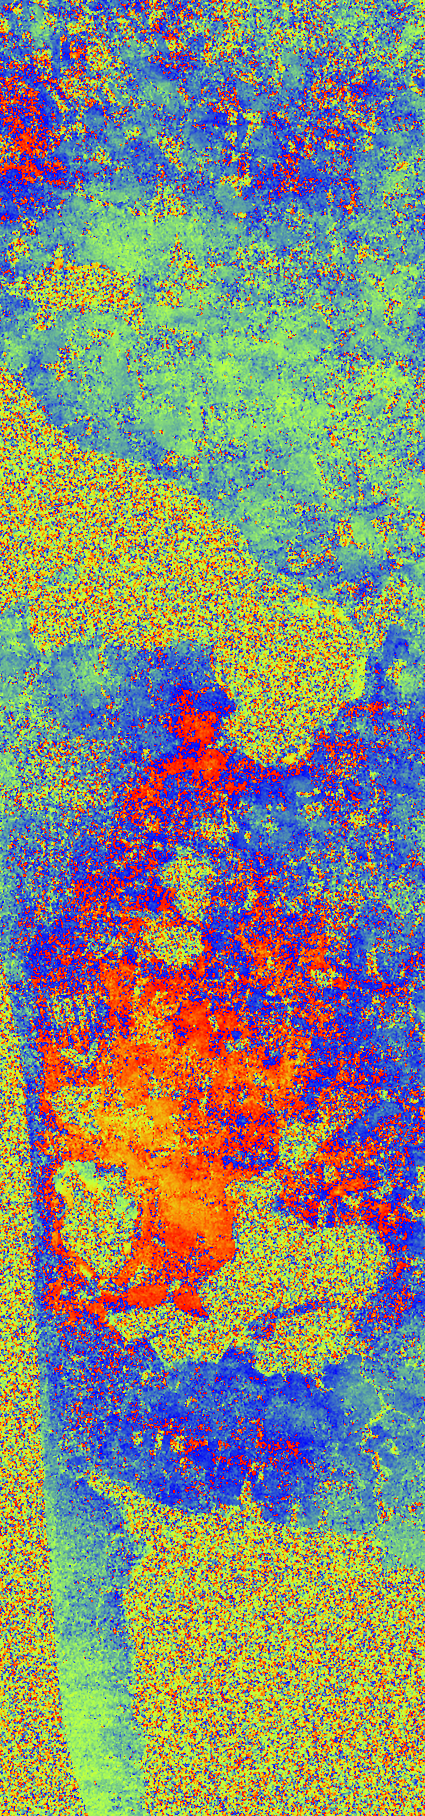

In [33]:
coherence = JLD.load("/home/data/eigil/results/interferogram/AA_VV_M20170321_8439_S20170402_080F_12d_coherence.jld", "data")[:, end:-1:1];
phase_img = SlcUtil.plot_phase(coherence)
